# Exercises

## Exercise 1: Image characteristics
---

**A.** Distiguishing pixels   

Fluctuations in the activitation of the neuron can be directly observed on the video or in a temporal trace plot of each pixel. Plotting the temporal trace will allow us to see the calcium transient dynamic, if a pixel belonging to a neuron is selected. 

* Select a set of *N* random pixels from the ROI and plot the temporal evolution of pixel value. If the random pixels are choosen from an active neuron, you will be able to see the calcium transcient dynamic. Try this a few time to appreciate the results.

The changes in fluorescence intensity captured with calcium imaging, are captured as temporal traces of pixel values. Each pixel corresponds to a specific region of interest (ROI) within the field of view, and the temporal trace of pixel values represents the fluorescence intensity over time. Calcium transients are observed as transient increases in pixel intensity, reflecting neuronal activity within the corresponding region of interest. As you can see below, when selecting random pixels, we can observe the differences in calcium transient dynamics, reflecting the variability in neuronal firing rates of the pixels.

**B.** Temporal statistics of pixel activation
 * For the selected pixels, plot the histogram of pixel value. What are the difference in different regions?, and how can that help to distinguish a pixel that belongs to aneuron from a background pixel?

Plotting histograms of pixel values for selected regions can reveal differences in the distribution of pixel intensities. These differences can help distinguish pixels belonging to neurons from background pixels in several ways. It can help us distniguish a pixel belonging to a neuron from a background pixel, as neurons typically exhibit higher intensity values due to calcium transients compared to background pixels. Peaks in the histogram corresponding to higher intensity values can indicate regions with neuronal activity. 

* If we can already see the calcium traces from individual pixels, why do we need to run source extraction to segment the neurons? Why, as a starter, would not be a good idea to work directly with the temporal traces of the pixels? 

While individual pixel traces may show calcium transients, analyzing the temporal patterns of pixel intensity changes across multiple pixels can provide more comprehensive insights into neuronal activity. By examining spatially coherent patterns of activity, we can better identify neuronal populations and their functional properties. This spatial information is crucial for analyzing neural circuits and understanding functional connectivity, which may not be apparent from individual pixel traces.

In [28]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import psutil
from pathlib import Path
import os

# CaImAn funtions and objects
import caiman as cm
from caiman.motion_correction import MotionCorrect, high_pass_filter_space
from caiman.source_extraction.cnmf import params as params
from caiman.source_extraction import cnmf
from caiman.source_extraction.cnmf.cnmf import load_CNMF

import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import auxiliary_functions as aux

#import seaborn as sns
#sns.set_theme(context='notebook',style='white',font_scale=1.5)


In [29]:
# download data for the lesson (this can take a few minutes)
download_data('https://surfdrive.surf.nl/files/index.php/s/HeYXPdvMO87fbq7')

KeyboardInterrupt: 

In [30]:
# set path to video of the full field of view
input_tif_file_path_FOV = 'C:/Users/Beheerder/OneDrive/Documents/neural-data-master/02-calcium_imaging/calcium_video.tif'   
input_tif_file_path = 'C:/Users/Beheerder/OneDrive/Documents/neural-data-master/02-calcium_imaging/caiman_video_trial_0.tif'  

In [31]:
FOV = cm.load(input_tif_file_path_FOV) # load video with complete field of view (FOV)

In [32]:
# play video (a new window will open)
FOV.play(gain = 1,  #light intensity of video
         magnification = 1, #size of display movie
         fr = 20) # frame rate at which the movie is played

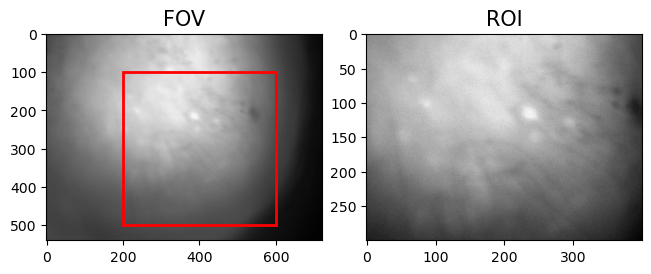

In [33]:
# Let's visualize the FOV and the ROI
aux.plot_FOV(FOV_file = input_tif_file_path_FOV , ROI_file = input_tif_file_path)

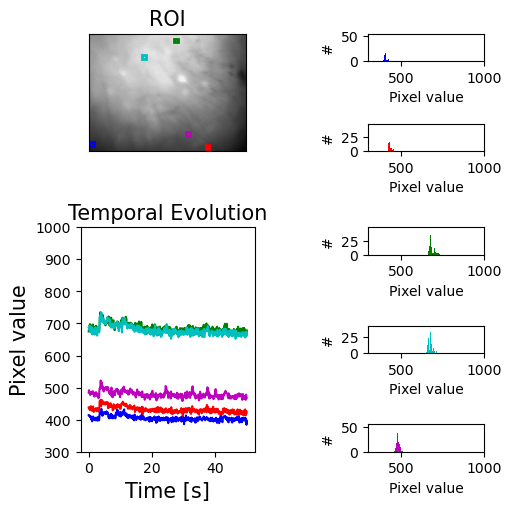

In [36]:
#Choosing a pixel at random and plotting the temporal evolution and histograms of pixel values
from auxiliary_functions import temporal_evolution as temporal_evolution

temporal_evolution(file_name=input_tif_file_path,
output_file_name='outputtest123')


In [17]:
# load movie and compute mean images with caiman functions
original_movie = cm.load(input_tif_file_path)
mean_image = cm.summary_images.mean_image(input_tif_file_path)
correlation_image,pnr_image = cm.summary_images.correlation_pnr(original_movie,swap_dim=False)

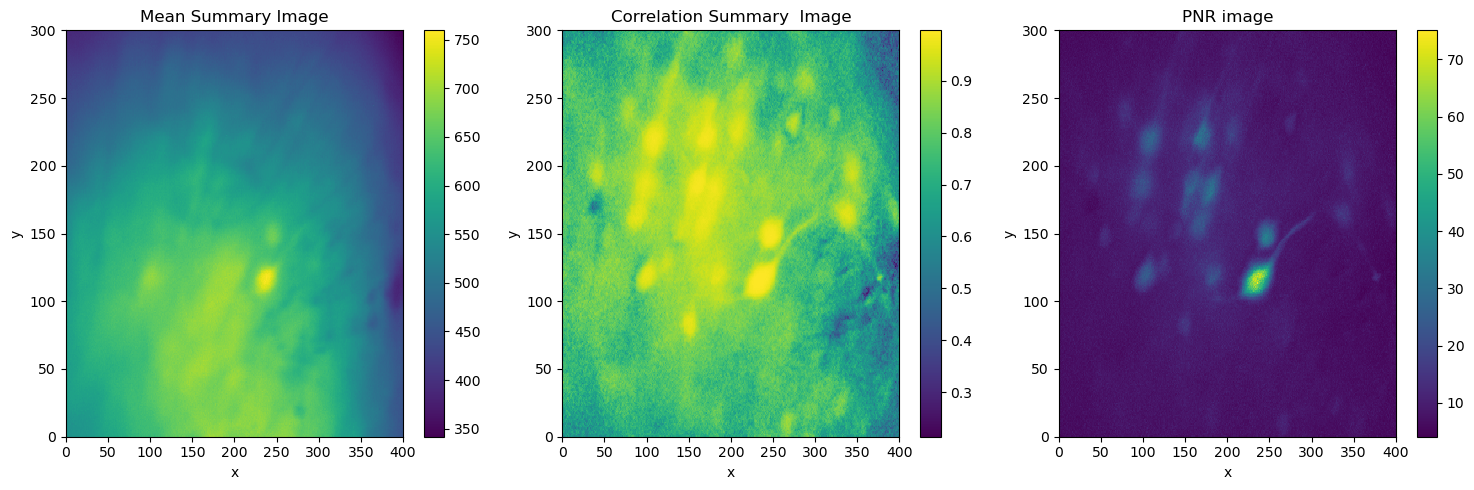

In [18]:
# Plot summary images
figure, axes = plt.subplots(1,3,figsize=(15,5))


axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Mean Summary Image')

axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Correlation Summary  Image')

axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].set_title('PNR image')

mesh0 = axes[0].pcolormesh(mean_image)
mesh1 = axes[1].pcolormesh(correlation_image)
mesh2 = axes[2].pcolormesh(pnr_image)

figure.colorbar(mesh0,ax=axes[0])
figure.colorbar(mesh1,ax=axes[1])
figure.colorbar(mesh2,ax=axes[2])


plt.tight_layout()

## Exercise 2: motion correction parameters
---

One parameter that impacts motion correction performance is the size of the spatial filter that is applyed to the video.

* Use the following function from CaImAn and plot the result of different space filtering applyed to a single frame of the video:from caiman.motion_correction import high_pass_filter_space

* How will this filtering affect the measure of crispness?

* Acording to Pnevmatikakis et al, which other factors are relevant for pw-rigid motion correction?

- Explore the impact of different parameters in the output of motion correction algorithm by measuring crispness in the correlation image of the final outcome. Particularly measure the effect of different spatial filter size by applying motion correction algorithm multiple times and computing the crispness of the output video. 

- Display all crispness values for rigid and not rigid motion correction and plot them agains gSig_filters values.

- If possible, show the impact of the crispness value that comes from changing other relevant paraments.

*Note1: The is no need to save all the motion corrected movies, just save the cripsness values.*

*Note2: gSig_filters is an optional range of posible values, but if your computer gets to slow in the computation reduce the range.*


## Exercise 3: Source extraction parameters 
---

* For a fixed minimum correlation value (ie 0.6) select a range of possible PNR minimun values and study the impact of those in the final source extraction output.

* For a fixed value of PNR (ie 6) select a range of minimum correlation valur and study the impact of those in the final source extraction output.

* How do these paramenters affect the spatial sparcity of the output? Which set of parameter selection procedes the higher number of neurons? Is maximal number of neurons always better? Why?  

* Generate a plot of number of neurons vs PNR (or min corr value) to show how these parameters affect the source extracted signals.

* Are the temporal traces affected by these parameters?

* For different PNR and minimum correlation value plot the correlation image and the selected cells.